In [562]:
# INTRO TO PANDAS: 
    # Pandas is widely used across the data science industry 
    # for data analysis/manipulation 
    # It comes with many convenient built in functions 
    #mthat we will be using to gain insights from a large dataset 
    
# ABOUT THE DATA: 
    # This notebook works with Week 7 NFL tracking data 
    # from the 2018 season 
    # The theme of the 2021 NFL Big Data bowl was passing 
    # plays so the data we are working with only includes 
    # plays on which a pass was thrown, the quarterback was sacked, 
    # or any one of five different penalties 
    # were called (defensive pass interference, 
    # offensive pass interference, defensive holding, illegal contact, 
    # or roughing the passer). 
    # On each play, linemen (both offensive and defensive) data are not provided. 

# Make imports 
import pandas as pd 

# Read data 
data = pd.read_csv("/Users/alexlindberg/Desktop/SAA_OSU/10.10_Meeting/week7.csv")
tracking = data

In [563]:
# Let's see how big our data is 
len(data)

982583

In [564]:
# Take a look at the "head" of the data 
data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-10-19T00:24:59.400Z,43.25,29.61,0.00,0.00,0.00,261.14,336.60,None,494307.0,Darian Stewart,26.0,FS,1,away,2018101800,96,right,NaN
1,2018-10-19T00:24:59.400Z,27.69,18.77,0.00,0.00,0.00,106.50,35.38,None,2495202.0,Von Miller,58.0,OLB,1,away,2018101800,96,right,NaN
2,2018-10-19T00:24:59.400Z,25.23,35.30,0.00,0.00,0.00,77.76,128.38,None,2506106.0,Larry Fitzgerald,11.0,WR,1,home,2018101800,96,right,OUT
3,2018-10-19T00:24:59.400Z,32.93,6.91,0.49,0.33,0.05,72.19,118.73,None,2507917.0,Tramaine Brock,22.0,CB,1,away,2018101800,96,right,NaN
4,2018-10-19T00:24:59.400Z,29.78,35.29,0.55,0.28,0.06,259.21,114.20,None,2530510.0,Chris Harris,25.0,CB,1,away,2018101800,96,right,NaN


In [565]:
# Sort by fastest single speeds
data = data.sort_values(by = 's', ascending = False)
data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
763851,2018-10-21T22:28:03.000Z,68.30,25.31,42.74,26.97,3.56,102.39,189.05,None,2495466.0,Mark Ingram,22.0,RB,35,away,2018102101,3078,left,NaN
763869,2018-10-21T22:28:03.099Z,67.79,22.64,41.46,12.53,2.72,102.39,188.69,None,2495466.0,Mark Ingram,22.0,RB,36,away,2018102101,3078,left,NaN
763887,2018-10-21T22:28:03.200Z,67.19,19.40,40.16,3.55,3.29,193.02,188.49,None,2495466.0,Mark Ingram,22.0,RB,37,away,2018102101,3078,left,NaN
763833,2018-10-21T22:28:02.900Z,68.97,28.80,39.59,35.09,2.31,97.28,189.54,None,2495466.0,Mark Ingram,22.0,RB,34,away,2018102101,3078,left,NaN
763905,2018-10-21T22:28:03.299Z,66.69,15.89,38.41,6.84,3.54,268.51,188.10,None,2495466.0,Mark Ingram,22.0,RB,38,away,2018102101,3078,left,NaN


In [566]:
# Filter out the obvious outliers 
outliers = data.loc[data['s'] > 13] 
outliers = outliers.sort_values(by = 's', ascending = False)
len(outliers)

8858

In [567]:
# Since 10502 is only around 1% of the total data, it is safe to completely remove these outliers from our data
data.drop(outliers.index, axis = 0, inplace = True)
len(data)

973725

In [568]:
# Let's take a look at our data again 
data.head() # What is the next issue that we have?

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
181391,2018-10-21T17:27:17.099Z,34.71,23.04,13.00,0.80,1.59,NaN,NaN,None,NaN,Football,NaN,NaN,37,football,2018102108,638,left,NaN
720780,2018-10-21T21:38:48.000Z,55.24,-1.98,12.98,5.47,1.16,NaN,NaN,None,NaN,Football,NaN,NaN,78,football,2018102110,1688,right,NaN
42063,2018-10-19T02:23:05.500Z,115.50,49.21,12.98,5.33,1.14,NaN,NaN,pass_arrived,NaN,Football,NaN,NaN,43,football,2018101800,2699,right,NaN
636344,2018-10-21T20:29:01.000Z,50.17,19.30,12.97,2.66,1.08,NaN,NaN,pass_arrived,NaN,Football,NaN,NaN,39,football,2018102107,4522,left,NaN
84219,2018-10-21T14:28:47.900Z,77.60,36.37,12.97,2.75,1.14,NaN,NaN,pass_arrived,NaN,Football,NaN,NaN,43,football,2018102100,1220,left,NaN


In [569]:
# Filter out rows that are tracking the football itself 
data = data.loc[data['displayName'] != 'Football']
data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
763996,2018-10-21T22:28:03.799Z,40.08,29.06,12.84,23.59,1.39,6.52,258.79,None,2495775.0,Eric Weddle,32.0,FS,45,home,2018102101,3078,left,NaN
742926,2018-10-21T22:06:56.799Z,51.50,15.66,12.71,5.83,0.96,8.48,89.25,None,2541834.0,Josh Hill,89.0,TE,32,away,2018102101,2687,right,HITCH
742941,2018-10-21T22:06:56.900Z,52.17,15.61,12.57,12.97,0.66,9.78,89.90,None,2541834.0,Josh Hill,89.0,TE,33,away,2018102101,2687,right,HITCH
763855,2018-10-21T22:28:03.000Z,57.27,19.99,12.56,6.34,1.23,309.61,221.14,None,2506122.0,Benjamin Watson,82.0,TE,37,away,2018102101,3078,left,NaN
764045,2018-10-21T22:28:04.000Z,51.22,29.84,12.54,1.63,1.87,323.36,227.58,None,2560878.0,Tre'Quan Smith,10.0,WR,45,away,2018102101,3078,left,NaN


In [570]:
# Adding a mph column to better understand the players' speeds 
data['mph'] = (data['s'] * 60 * 60 / 1760)
data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,mph
763996,2018-10-21T22:28:03.799Z,40.08,29.06,12.84,23.59,1.39,6.52,258.79,None,2495775.0,Eric Weddle,32.0,FS,45,home,2018102101,3078,left,NaN,26.263636
742926,2018-10-21T22:06:56.799Z,51.50,15.66,12.71,5.83,0.96,8.48,89.25,None,2541834.0,Josh Hill,89.0,TE,32,away,2018102101,2687,right,HITCH,25.997727
742941,2018-10-21T22:06:56.900Z,52.17,15.61,12.57,12.97,0.66,9.78,89.90,None,2541834.0,Josh Hill,89.0,TE,33,away,2018102101,2687,right,HITCH,25.711364
763855,2018-10-21T22:28:03.000Z,57.27,19.99,12.56,6.34,1.23,309.61,221.14,None,2506122.0,Benjamin Watson,82.0,TE,37,away,2018102101,3078,left,NaN,25.690909
764045,2018-10-21T22:28:04.000Z,51.22,29.84,12.54,1.63,1.87,323.36,227.58,None,2560878.0,Tre'Quan Smith,10.0,WR,45,away,2018102101,3078,left,NaN,25.650000


In [571]:
# Function that will find the first five players with five 
# occurences of top speed. This will verify which players
# actually are sustaining top speeds on a play 
def get_five_fastest(df):
    top_five = {} # dict to store the five players
    occurences_dict = {} # dict to store how many times each player has occured
    for name in list(df['displayName']):
        if name in occurences_dict: 
            occurences_dict[name] = occurences_dict[name] + 1
            # ensuring they have a good speed for at least a second  
            if occurences_dict[name] > 9: 
                # initialize in top 5
                top_five[name] = 1 
        else: 
            # initialize in occurence 
            occurences_dict[name] = 1  
        if len(top_five) > 4: 
            # if top 5 dict is full exit the loop 
            break 
    return top_five
        
        

In [572]:
# Test out our function 

test_list = get_five_fastest(data)
test_list

{'Robby Anderson': 1,
 'Kevin Byard': 1,
 'Will Fuller': 1,
 'Kenny Stills': 1,
 'Tyrell Williams': 1}

In [573]:
# Now we actually need to get the respective speeds of these players 
def get_avg_speed(player, df): 
    avg = 0
    player_data = df.loc[df['displayName'] == player]
    # should already be sorted by speed but we can do it again to make sure 
    player_data = player_data.sort_values(by = 'mph', ascending = False)
    # Loop through the fastest five occurences of 
    # the player to get their top avg speed over half second
    speeds = list(player_data['mph'])
    for i in range(6): 
        avg = avg + speeds[i]
    avg = avg / 5
    # return the average rounded to two decimal places 
    return round(avg, 2)

In [574]:
# Testing out our function with Robby Anderson as the input 
robby_test = get_avg_speed('Robby Anderson', data)
print(robby_test)

25.76


In [575]:
# Function to update the dictionary with 
# the speeds of each respective player 
def update_dict(speed_dict, data): 
    for player in speed_dict: 
        speed_dict[player] = get_avg_speed(player, data)

In [576]:
# Lets combine the functions we have created 
# into one master function that returns a complete dictionary 
def get_speed_dict(df): 
    speed_dict = get_five_fastest(df)
    update_dict(speed_dict, df)
    return speed_dict

In [577]:
# Test out the newly created "master" function 
test_dict = get_speed_dict(data)
test_dict

{'Robby Anderson': 25.76,
 'Kevin Byard': 25.75,
 'Will Fuller': 25.63,
 'Kenny Stills': 25.07,
 'Tyrell Williams': 24.79}

In [578]:
# Now we are ready to plot some of our results 
import matplotlib.pyplot as plt 
import numpy as np 
# Lets define a function that will perform the plotting for us
def plot_speed(df): 
    #Popular plotting style ggplot 
    plt.style.use('ggplot') 
    # ax deals with the axis and fig deals with the plot as a whole
    fig, ax = plt.subplots()
    top_five = get_speed_dict(df)
    # define y values
    players = top_five.keys() 
    # define x values 
    speeds = top_five.values() 
    # Get the right spacing 
    y_pos = np.arange(len(players)) 
    ax.barh(y_pos, speeds)
    ax.set_yticks(y_pos, labels = players)
    plt.xlim([min(speeds) - 1, max(speeds) + 1])
    plt.xlabel('Speed (MPH)')
    plt.title("Fastest Sustained Speeds")
    for idx, val in enumerate(speeds):
        plt.text(val, idx, str(val))
        

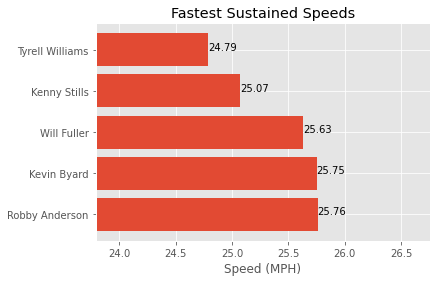

In [579]:
plot_speed(data)

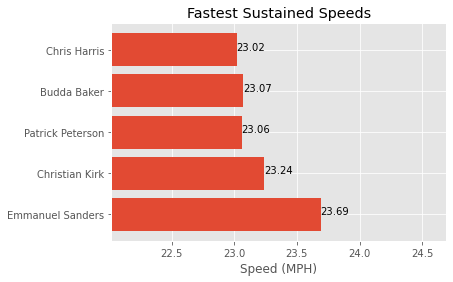

In [580]:
# If we wanted to do this for a certain game instead of every game in one week 
game_data = data.loc[data['gameId'] == 2018101800]
plot_speed(game_data)

In [581]:
data['route'].unique()

array([nan, 'HITCH', 'GO', 'POST', 'CROSS', 'IN', 'FLAT', 'WHEEL',
       'CORNER', 'SCREEN', 'SLANT', 'OUT', 'ANGLE', 'undefined'],
      dtype=object)

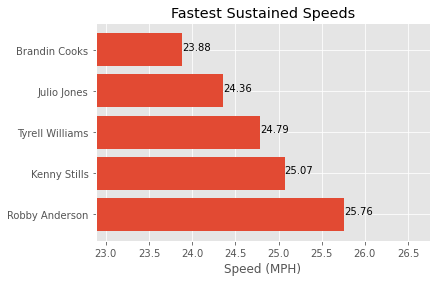

In [582]:
go_routes = data.loc[data['route'] == 'GO']
plot_speed(go_routes)

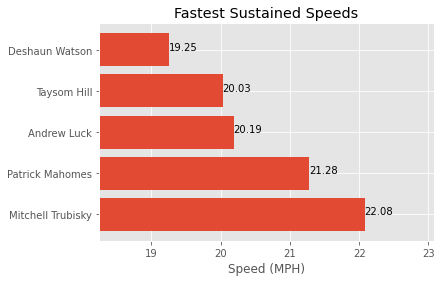

In [583]:
qbs = data.loc[data['position'] == 'QB']
plot_speed(qbs)

In [584]:
data['position'].unique()

array(['FS', 'TE', 'WR', 'RB', 'CB', 'FB', 'LB', 'SS', 'OLB', 'ILB', 'S',
       'DB', 'MLB', 'QB', 'HB', 'DE', 'DT'], dtype=object)

In [585]:
# IF WE HAVE TIME SHOW QUICK EXAMPLE 
# OF USING ONE DATABASE TO REFERENCE ANOTHER:

# Filter original data to 
# only include ball tracking data 
football_data = tracking.loc[tracking['displayName'] == 'Football']
football_data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
14,2018-10-19T00:24:59.400Z,26.78,23.98,0.0,0.0,0.0,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018101800,96,right,NaN
29,2018-10-19T00:24:59.500Z,26.78,23.98,0.0,0.0,0.0,NaN,NaN,None,NaN,Football,NaN,NaN,2,football,2018101800,96,right,NaN
44,2018-10-19T00:24:59.599Z,26.78,23.98,0.0,0.0,0.0,NaN,NaN,None,NaN,Football,NaN,NaN,3,football,2018101800,96,right,NaN
59,2018-10-19T00:24:59.700Z,26.78,23.99,0.0,0.0,0.0,NaN,NaN,None,NaN,Football,NaN,NaN,4,football,2018101800,96,right,NaN
74,2018-10-19T00:24:59.799Z,26.78,23.99,0.0,0.0,0.0,NaN,NaN,None,NaN,Football,NaN,NaN,5,football,2018101800,96,right,NaN


In [586]:
# Sort by top ball speeds 
football_data = football_data.sort_values(by = 's', ascending = False)

In [587]:
# Get unique rows 
football_data = football_data.drop_duplicates(subset = ['playId'])

In [588]:
football_data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
59667,2018-10-19T03:16:18.299Z,92.77,24.69,28.03,0.55,1.49,NaN,NaN,pass_forward,NaN,Football,NaN,NaN,45,football,2018101800,3926,left,NaN
758172,2018-10-21T22:22:34.900Z,13.93,29.34,27.15,0.33,2.80,NaN,NaN,None,NaN,Football,NaN,NaN,46,football,2018102110,2426,right,NaN
52448,2018-10-19T03:00:38.900Z,84.17,24.31,26.65,1.08,2.46,NaN,NaN,None,NaN,Football,NaN,NaN,48,football,2018101800,3526,left,NaN
482468,2018-10-21T19:25:43.000Z,48.60,52.09,26.60,1.17,3.31,NaN,NaN,None,NaN,Football,NaN,NaN,85,football,2018102102,3277,left,NaN
200853,2018-10-21T17:34:54.200Z,98.70,38.80,26.60,0.66,3.71,NaN,NaN,None,NaN,Football,NaN,NaN,68,football,2018102104,811,left,NaN


In [589]:
# Load in new data to reference 
play_data = pd.read_csv("/Users/alexlindberg/Desktop/SAA_OSU/10.10_Meeting/plays.csv")
play_data.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [590]:
# Filter new database by referencing first row of other database
top_ball_speed = \
play_data.loc[(play_data['gameId'] == football_data['gameId'].iloc[0]) \
              & (play_data['playId'] == football_data['playId'].iloc[0])]

In [591]:
# Now we know the hardest thrown pass in all of Week 7 2018
top_ball_speed['playDescription'].iloc[0]

'(4:09) (Shotgun) J.Rosen pass deep middle to C.Kirk to ARZ 46 for 27 yards (C.Harris).'